## Skipable: Our Read-In / Cleaning Functions

In [1]:
# ----Skip this Section ----
# code to import and clean the data on heights in the US
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


def import_and_clean_data(filepath):
    dataset = read_data(filepath)
    dataset = clean_data(dataset)
    return dataset
    
def read_data(filepath):
    #read and format the US data
    dataset = pd.read_csv(filepath)
    dataset.columns = ['index', 'height', 'weight', 'age']
    return dataset

def clean_data(dataset):
    # clean up the imported data
    us_pop_heights = np.array(dataset["height"])
    us_pop_heights = us_pop_heights[np.logical_and(us_pop_heights<=50, us_pop_heights<=250)]
    old_state = np.random.get_state()
    np.random.seed(100)
    # validate the distribution
    us_population_size = 300000000
    female_pop = int(np.floor(us_population_size*.508))
    us_pop_heights = np.zeros(us_population_size)
    mean = np.mean(us_pop_heights)
    us_pop_heights[0:female_pop] = np.random.normal(163,5,female_pop)
    sd = np.std(us_pop_heights)
    female_validated = np.random.normal(180,7,us_population_size-female_pop)
    # repeat for other half
    us_pop_heights[female_pop:us_population_size] = female_validated
    us_pop_heights = np.round(us_pop_heights, 2)
    np.random.set_state(old_state)
    cleaned_pop_heights = np.random.choice(us_pop_heights, 107)
    mean = np.mean(us_pop_heights)
    
    #orient the right way and exit
    cleaned_pop_heights = np.transpose(cleaned_pop_heights)
    return cleaned_pop_heights

## Start Here: Data Read-in and Summary

In [3]:
#------Run These Once-----
# Import and cleaning takes a while, so just run this cell once


# Edit the filepath variable to the place you saved US_data.csv (or move US_data to the folder holding this notebook)
filepath="data/US_data.csv"
height_data = import_and_clean_data(filepath)

Object Type: <class 'numpy.ndarray'>
Dimensions: (107,)
Example Values: [ 177.72  179.18  190.94  169.44  159.11  183.55  164.15  166.43  174.3
  161.3 ]


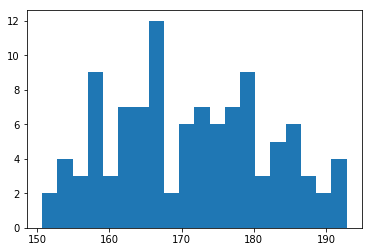

In [4]:
print("Object Type:", type(height_data))
print("Dimensions:", height_data.shape)
print("Example Values:", height_data[0:10])
plt.hist(height_data,20);

## Exercise 1: Vectorized Operations
We see above that the data is in a **numpy array**. We'll be using numpy a TON in this class, so we want to get you familiar with its layout.

First, numpy wants to perform operations on _entire vectors_ not individual elements. So instead of looping over each element, google for "numpy [name of thing you want to do]" and see if there's a built-in function. The built-ins will be much faster.

There are a lot of other "gotcha"s in numpy; we'll try to cover all of them in this lab.

**In the cell bleow**, calculate the mean, variance, and maximum value of the heights.

In [7]:
# ---- your code here ----

#calculate the mean
print(np.mean(height_data))

#calculate the variance
print(np.var(height_data, ddof = 1))

#calculate the maximum
print(np.max(height_data))

171.265514019
114.83043629
192.84


## Exercise 2: Bootstrapping
We've talked a lot about bootstrapping in lecture. Now it's time to implement.

We're going to write code for a non-parametric bootstrap, where we simply resample the data to build a new dataset, calculate the value of interest on that dataset, and repeat. We then use the distribution of the values-of-interest obtained as the sampling distribution of the value of interest.

**In the cell below**, implement a bootstrap procedure to find the sampling disttibution for the mean of the data. This will basically consist of np.random.choice() with replacement, a for loop, and your desired calculation(s).

Conduct 1000 bootstrap samples and plot a histogram of the sampling distribution.

1. If you are new to numpy, just find the sampling distribution of the mean. 
2. If you've used numpy before, also plot the sampling distribution of the variance and the max, using a preallocated 3 by 1000 array.
3. If you're a numpy expert, make a full-on do_bootstrap() function. Decide what inputs, features, and outputs are appropriate.

If you have extra time, climb the code-quality lader above. Your TF will be around to help

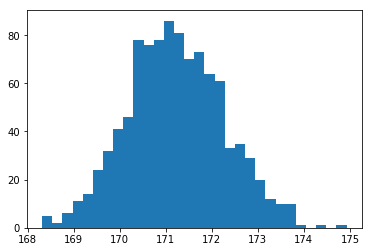

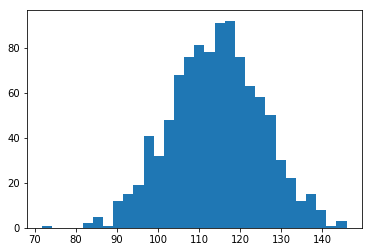

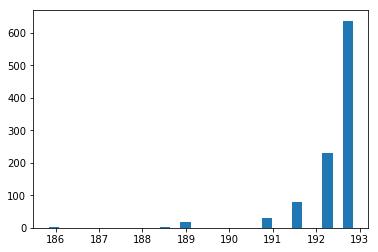

In [35]:
def do_bootstrap(func, data, num_resamples):
    stat_arr = np.zeros(num_resamples)
    for i in range(num_resamples):
        bootstrap_sample = np.random.choice(height_data, size = len(data), replace = True)
        
        if func != np.var:
            stat_arr[i] = func(a = bootstrap_sample)
        elif func == np.var:
            stat_arr[i] = func(a = bootstrap_sample, ddof = 1)
        
    return(stat_arr)


mean_arr = do_bootstrap(np.mean, height_data, 1000)
plt.hist(mean_arr, 30)
plt.show()

var_arr = do_bootstrap(np.var, height_data, 1000)
plt.hist(var_arr, 30)
plt.show()

max_arr = do_bootstrap(np.max, height_data, 1000)
plt.hist(max_arr, 30)
plt.show()